# Wrangle and analyze data

### by Jérôme d'Harveng


## Table of Contents
- [Introduction](#intro)
- [Part I - Gathering](#gather)
- [Part II - Assessing](#assess)
- [Part III - Cleaning](#clean)
- [Part IV - Storing](#storing)
- [Part V - Analysis](#analysis)
- [Part V - Conclusion](#conclusion)

<a id='intro'></a>
## Introduction

Using different Python libraries, data was gathered from WeRateDogs. First, through tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comments about the dogs. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent."

Missing data as for example retweet_count and favourite count, were extracted based on the tweet_id coming from the tweet archive, through the Twitter API. And finally, we could use predictions concerning the dogbreed, based on one of the available pictures.

<a id='gather'></a>
## Part I: Gathering

In [1]:
# import of necessary libraries
import pandas as pd
import numpy as np
import os
import requests
import tweepy
import time
import json
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Read the twitter archive as a Dataframe (FILE I)
tweet_archive = pd.read_csv('twitter_archive_enhanced.csv')

In [3]:
# Create folder Work if doesn't yet exist
folder_name = 'Work'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
# download the image_predictions.tsv file programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [3]:
# file will be downloaded in current directory (the one of the wrangle_act.ipynb)
cwd = os.getcwd()

In [14]:
with open(os.path.join(cwd,url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [4]:
# check of the files 
os.listdir(cwd)

['.DS_Store',
 '.ipynb_checkpoints',
 'act_report.pdf',
 'image-predictions.tsv',
 'tweet_json.txt',
 'twitter_archive_enhanced.csv',
 'twitter_archive_master.csv',
 'wrangle_act.ipynb',
 'wrangle_report.pdf']

In [5]:
# Read the image predictions (FILE II)
image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')

In [7]:
df_list = []
tweet_errors = []

# Calculate the time of execution
start_time = time.time()
for idTweet in tweet_archive.tweet_id:
    # initier le timer
    
    try:
        tweet = api.get_status(idTweet, tweet_mode='extended',wait_on_rate_limit=True, wait_on_rate_limit_notify=True) 
        # in order to see the evolution of the querying => printing the tweetID after each query
        print(idTweet)
        retweet = tweet.retweet_count
        favourite = tweet.favorite_count
        user_favourite = tweet.user.favourites_count
        user_followers = tweet.user.followers_count  
        tweet_date = tweet.created_at
        
        df_list.append({'tweet_id': int(idTweet),
                        'retweet_count': int(retweet),
                        'favourite_count': int(favourite),
                        'user_favourite' : int(user_favourite),
                        'user_followers' : int(user_followers),
                        'tweet_date' : pd.to_datetime(tweet_date)})

    
    # in case the idTweet of tweet_archive wouldn't be available anymore from the API
    except Exception as e: 
        tweet_errors.append(idTweet)
        
# duration of querying in minutes
query_duration = (time.time() - start_time)/60
print("The querying of the API took " + str(query_duration))

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
882268110199369728
882045870035918850
881906580714

819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107983360
818646164899774465
818627210458333184
818614493328580609
818588835076603904
818536468981415936
818307523543449600
818259473185828864
818145370475810820
817908911860748288
817827839487737858
817777686764523521
817536400337801217
817502432452313088
817423860136083457
817415592588222464
817181837579653120
817171292965273600
817120970343411712
817056546584727552
816829038950027264
816816676327063552
816697700272001025
816450570814898180
816336735214911488
816091915477250048
816062466425819140
816014286006976512
815990720817401858
815966073409433600
815745968457060357
815736392542261248
815639385530101762
815390420867969024
814986499976527872
814638523311648768
814578408554463233
814530161257443328
814153002265309185
813944609378369540
813910438903693312
813812741911748608
813800681631023104
813217897535406080
813202720496779264
813187593374

760893934457552897
760656994973933572
760641137271070720
760539183865880579
760521673607086080
760290219849637889
760252756032651264
760190180481531904
760153949710192640
759943073749200896
759923798737051648
759846353224826880
759793422261743616
759566828574212096
759557299618865152
759447681597108224
759446261539934208
759197388317847553
759159934323924993
759099523532779520
759047813560868866
758854675097526272
758828659922702336


Rate limit reached. Sleeping for: 662


758740312047005698
758474966123810816
758467244762497024
758405701903519748
758355060040593408
758099635764359168
758041019896193024
757741869644341248
757729163776290825
757725642876129280
757611664640446465
757597904299253760
757596066325864448
757400162377592832
757393109802180609
757354760399941633
756998049151549440
756939218950160384
756651752796094464
756526248105566208
756303284449767430
756288534030475264
756275833623502848
755955933503782912
755206590534418437
755110668769038337
754874841593970688
754856583969079297
754747087846248448
754482103782404096
754449512966619136
754120377874386944
753655901052166144
753420520834629632
753398408988139520
753375668877008896
753298634498793472
753294487569522689
753039830821511168
753026973505581056
752932432744185856
752917284578922496
752701944171524096
752682090207055872
752660715232722944
752568224206688256
752519690950500352
752334515931054080
752309394570878976
752173152931807232
751950017322246144
751937170840121344
751830394383

705442520700944385
705428427625635840
705239209544720384
705223444686888960
705102439679201280
705066031337840642
704871453724954624
704859558691414016
704847917308362754
704819833553219584
704761120771465216
704499785726889984
704491224099647488
704480331685040129
704364645503647744
704347321748819968
704134088924532736
704113298707505153
704054845121142784
703774238772166656
703769065844768768
703631701117943808
703611486317502464
703425003149250560
703407252292673536
703382836347330562
703356393781329922
703268521220972544
703079050210877440
703041949650034688
702932127499816960
702899151802126337
702684942141153280
702671118226825216
702598099714314240
702539513671897089
702332542343577600
702321140488925184
702276748847800320
702217446468493312
701981390485725185
701952816642965504
701889187134500865
701805642395348998
701601587219795968
701570477911896070
701545186879471618
701214700881756160
700890391244103680
700864154249383937
700847567345688576
700796979434098688
700747788515

678410210315247616
678399652199309312
678396796259975168
678389028614488064
678380236862578688
678341075375947776
678334497360859136
678278586130948096
678255464182861824
678023323247357953
678021115718029313
677961670166224897
677918531514703872
677895101218201600
677716515794329600
677700003327029250
677698403548192770
677687604918272002
677673981332312066
677662372920729601
677644091929329666
677573743309385728
677565715327688705
677557565589463040
677547928504967168
677530072887205888
677335745548390400
677334615166730240
677331501395156992
677328882937298944
677314812125323265
677301033169788928
677269281705472000
677228873407442944


Rate limit reached. Sleeping for: 663


677187300187611136
676975532580409345
676957860086095872
676949632774234114
676948236477857792
676946864479084545
676942428000112642
676936541936185344
676916996760600576
676897532954456065
676864501615042560
676821958043033607
676819651066732545
676811746707918848
676776431406465024
676617503762681856
676613908052996102
676606785097199616
676603393314578432
676593408224403456
676590572941893632
676588346097852417
676582956622721024
676575501977128964
676533798876651520
676496375194980353
676470639084101634
676440007570247681
676430933382295552
676263575653122048
676237365392908289
676219687039057920
676215927814406144
676191832485810177
676146341966438401
676121918416756736
676101918813499392
676098748976615425
676089483918516224
675898130735476737
675891555769696257
675888385639251968
675878199931371520
675870721063669760
675853064436391936
675849018447167488
675845657354215424
675822767435051008
675820929667219457
675798442703122432
675781562965868544
675740360753160193
675710890956

668226093875376128
668221241640230912
668204964695683073
668190681446379520
668171859951755264
668154635664932864
668142349051129856
668113020489474048
667937095915278337
667924896115245057
667915453470232577
667911425562669056
667902449697558528
667886921285246976
667885044254572545
667878741721415682
667873844930215936
667866724293877760
667861340749471744
667832474953625600
667806454573760512
667801013445750784
667793409583771648
667782464991965184
667773195014021121
667766675769573376
667728196545200128
667724302356258817
667550904950915073
667550882905632768
667549055577362432
667546741521195010
667544320556335104
667538891197542400
667534815156183040
667530908589760512
667524857454854144
667517642048163840
667509364010450944
667502640335572993
667495797102141441
667491009379606528
667470559035432960
667455448082227200
667453023279554560
667443425659232256
667437278097252352
667435689202614272
667405339315146752
667393430834667520
667369227918143488
667211855547486208
667200525029

In [8]:
# test on total amount tweet_id found and not => sum should be equal to the dimesion of tweet_archive
len(df_list) + len(tweet_errors) == tweet_archive.shape[0] 

True

In [9]:
df_list[3]

{'tweet_id': 891689557279858688,
 'retweet_count': 8512,
 'favourite_count': 41549,
 'user_favourite': 139607,
 'user_followers': 7430626,
 'tweet_date': Timestamp('2017-07-30 15:58:51')}

In [52]:
# writhing df_list in a .txt file 
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(df_list, outfile,default=str)

In [10]:
os.listdir()

['.DS_Store',
 '.ipynb_checkpoints',
 'image-predictions.tsv',
 'tweet_json.txt',
 'twitter_archive_enhanced.csv',
 'Work',
 'wrangle_act.ipynb']

In [10]:
# in the meanwhile => using regular way to transform the list into a Dataframe
# Create DataFrame from list of dictionaries
tweet_API = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favourite_count','user_favourite','user_followers','tweet_date'])

<a id='assess'></a>
## Part II: Assessing

In [11]:
tweet_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [12]:
tweet_archive.expanded_urls[0]

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

In [13]:
tweet_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
278,840268004936019968,NaN,NaN,2017-03-10 18:27:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Monty. He makes instantly regrettable ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/840268004...,12,10,Monty,None,None,None,None
1506,691756958957883396,NaN,NaN,2016-01-25 22:58:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",THE BRITISH ARE COMING\nTHE BRITISH ARE COMING...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691756958...,10,10,None,None,None,None,None
1708,680798457301471234,NaN,NaN,2015-12-26 17:12:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Moofasa. He must be a powerful do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680798457...,6,10,Moofasa,None,None,None,None
1887,674788554665512960,NaN,NaN,2015-12-10 03:11:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Maggie. She's a Western Septic Do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674788554...,9,10,Maggie,None,None,None,None
1692,681302363064414209,NaN,NaN,2015-12-28 02:35:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chuck. He's a neat dog. Very flexible....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681302363...,3,10,Chuck,None,None,None,None
283,838952994649550848,NaN,NaN,2017-03-07 03:22:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",SHE MISPLACED HER HOOMAN 13/10 MISTAKES HAPPEN...,NaN,NaN,NaN,https://twitter.com/ktla/status/83894871422799...,13,10,None,None,None,None,None
2319,666447344410484738,NaN,NaN,2015-11-17 02:46:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. She is a black Downton Abbey. I...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666447344...,9,10,Scout,None,None,None,None
1462,694905863685980160,NaN,NaN,2016-02-03 15:30:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He's a Bisquick Taj Mapaw. Too...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694905863...,10,10,Archie,None,None,None,None
272,840761248237133825,NaN,NaN,2017-03-12 03:07:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Maddie and Gunner....,8.406323e+17,4.196984e+09,2017-03-11 18:35:42 +0000,"https://www.gofundme.com/3hgsuu0,https://twitt...",12,10,Maddie,None,None,None,None
1505,691793053716221953,NaN,NaN,2016-01-26 01:21:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We usually don't rate penguins but this one is...,NaN,NaN,NaN,https://vine.co/v/OTTVAKw6YlW,10,10,None,None,None,None,None


In [14]:
tweet_archive.name.value_counts() 

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
Sadie          8
the            8
an             7
Toby           7
Daisy          7
Bailey         7
Buddy          7
Milo           6
Stanley        6
Leo            6
Jax            6
Jack           6
Bella          6
Rusty          6
Scout          6
Koda           6
Oscar          6
Dave           6
very           5
            ... 
Dewey          1
Jett           1
Mookie         1
Charl          1
Ruffles        1
Billl          1
Perry          1
Sonny          1
Dixie          1
Flurpson       1
Aja            1
Iroh           1
Karl           1
Sora           1
Stu            1
Puff           1
Berkeley       1
Darla          1
Rizzo          1
Ridley         1
Jonah          1
Emma           1
Crumpet        1
Sky            1
Schnitzel      1
Kendall        1
Karll          1
Jerome        

In [15]:
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [16]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1182,738402415918125056,https://pbs.twimg.com/media/Cj9VEs_XAAAlTai.jpg,1,cocker_spaniel,0.346695,True,Blenheim_spaniel,0.193905,True,Chihuahua,0.078000,True
1117,725786712245440512,https://pbs.twimg.com/media/ChKDKmIWIAIJP_e.jpg,1,chow,0.335761,True,Samoyed,0.167173,True,kuvasz,0.145715,True
1847,839290600511926273,https://pbs.twimg.com/media/C6XBt9XXEAEEW9U.jpg,1,web_site,0.670892,False,monitor,0.101565,False,screen,0.075306,False
1656,810657578271330305,https://pbs.twimg.com/media/C0AIwgVXAAAc1Ig.jpg,1,malamute,0.753521,True,Siberian_husky,0.166151,True,Eskimo_dog,0.069811,True
2006,877611172832227328,https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg,1,Irish_setter,0.364729,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True
1194,740359016048689152,https://pbs.twimg.com/media/CkZImGVUoAAwv0b.jpg,1,golden_retriever,0.863687,True,kuvasz,0.048590,True,Labrador_retriever,0.047397,True
550,677547928504967168,https://pbs.twimg.com/media/CWciPonWEAUOqLD.jpg,1,American_Staffordshire_terrier,0.914978,True,Staffordshire_bullterrier,0.084395,True,boxer,0.000462,True
389,673359818736984064,https://pbs.twimg.com/media/CVhBLohWEAAXtYl.jpg,1,English_setter,0.696568,True,Brittany_spaniel,0.104046,True,Ibizan_hound,0.034832,True
764,688916208532455424,https://pbs.twimg.com/media/CY-Fn1FWEAQhzhs.jpg,1,Pembroke,0.430544,True,red_fox,0.206576,False,Pomeranian,0.154352,True


In [17]:
tweet_API.head(2)

,tweet_id,retweet_count,favourite_count,user_favourite,user_followers,tweet_date
0,892420643555336193,8374,38222,139607,7430626,2017-08-01 16:23:56
1,892177421306343426,6182,32764,139607,7430626,2017-08-01 00:17:27


In [18]:
tweet_API.sample(10)

,tweet_id,retweet_count,favourite_count,user_favourite,user_followers,tweet_date
198,852936405516943360,2107,0,139607,7430631,2017-04-14 17:27:40
2328,666082916733198337,44,116,139609,7430726,2015-11-16 02:38:37
1177,717841801130979328,633,2568,139607,7430669,2016-04-06 22:29:56
24,887101392804085760,5875,30134,139607,7430627,2017-07-18 00:07:08
1050,740995100998766593,2972,6735,139607,7430668,2016-06-09 19:52:53
644,791784077045166082,10652,0,139607,7430636,2016-10-27 23:30:09
1176,718234618122661888,1070,4063,139607,7430669,2016-04-08 00:30:51
1758,678278586130948096,6495,12005,139609,7430678,2015-12-19 18:19:51
1041,742385895052087300,2140,7167,139607,7430668,2016-06-13 15:59:24
1221,712668654853337088,1300,4363,139607,7430668,2016-03-23 15:53:42


In [19]:
tweet_archive.shape

(2356, 17)

In [20]:
image_predictions.shape

(2075, 12)

In [21]:
tweet_API.shape

(2342, 6)

In [22]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [23]:
tweet_archive.text.sample(5)

99      Here's a very large dog. He has a date later. ...
2187    This is Chaz. He's an X Games half pipe supers...
678     This is Stella. She's happier than I will ever...
1331    "Ma'am, for the last time, I'm not authorized ...
1687    This is Apollo. He thought you weren't coming ...
Name: text, dtype: object

In [24]:
# we only want original tweets (no retweets) => so following rows will have to be removed from analisis
tweet_archive[-(tweet_archive.retweeted_status_id.isnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [25]:
tweet_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [26]:
tweet_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [27]:
tweet_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [28]:
tweet_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [29]:
tweet_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [30]:
tweet_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [31]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
beagle                        18
Shetland_sheepdog             18
Maltese_dog                   18
Eskimo_dog                    18
teddy                         18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [33]:
tweet_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 6 columns):
tweet_id           2342 non-null int64
retweet_count      2342 non-null int64
favourite_count    2342 non-null int64
user_favourite     2342 non-null int64
user_followers     2342 non-null int64
tweet_date         2342 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 109.9 KB


In [34]:
# Check for duplicates
tweet_archive.tweet_id.duplicated().sum(),image_predictions.tweet_id.duplicated().sum(),tweet_API.tweet_id.duplicated().sum()

(0, 0, 0)

In [35]:
tweet_archive.tweet_id[0]

892420643555336193

In [36]:
all_columns = pd.Series(list(tweet_archive) + list(image_predictions) + list(tweet_API))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [37]:
tweet_archive.query('tweet_id == 892420643555336193 ').timestamp

0    2017-08-01 16:23:56 +0000
Name: timestamp, dtype: object

In [38]:
tweet_API.query('tweet_id == 892420643555336193 ').tweet_date

0   2017-08-01 16:23:56
Name: tweet_date, dtype: datetime64[ns]

#### Quality
##### `tweet_archive`
- Only original tweets needed for analysis (= with retweeted_status_id = NAN)
- Only tweets with an image will be used (= only using the tweets for which the tweet_id exists in image_predictions
- Timestamp column and Retweeted_status_timestamp not in datetime type
- In_reply_to_status_id, in_reply_to_user_id, retweeted_status_id  and retweeted_status_user_id are floats and should be int
- Source series has 4 different categories but hidden in unnessecary html tags (cfr value_counts())
- Several mistakes in Name series, such as: "a, an, the, his, ... " that should be NAN, seems to be words that aren't capitalized
- In name, doggo, floofer, pupper and puppo, "None" instead of NAN (gives for example a wrong vision with .info() function)
- There seems to be errors in some value of rating_denominator, as this should be 10, but this won't be tackled in this cleaning.

##### `image_predictions`
- Some strings in p1, p2 and p3 are lowercase other with first letter capitalized 



##### `tweet_API`
- 14 tweet_id from tweet_archive couldn't be queried through the Twitter API (= will have to be removed from the analysis)

#### Tidiness
- Information of `tweet_API` should be in `tweet_archive` table
- Once merged, tweet_date in `tweet_API` should be dropped as it has the same values as timestamp from `tweet_archive`
- Join image_predictions with the previous merged 2 tables


<a id='clean'></a>
## Part III: Cleaning

In [39]:
# work on copies of the original dataframes
tweet_archive_clean  = tweet_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_API_clean = tweet_API.copy()

### Quality

##### First handling missing values

#### 1. `tweet_archive`: Only original tweets needed for analysis

##### Define
Only keep the rows of the dataframe where **retweeted_status_id** = NAN

##### Code

In [40]:
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean.retweeted_status_id.isnull()]

##### Test

In [41]:
# check if still rows where retweeted_status_id is NAN
tweet_archive_clean[-(tweet_archive_clean.retweeted_status_id.isnull())].tweet_id.count()

0

#### 2. `tweet_archive`: Only tweets with an image will be used 

##### Define
Only using the tweets for which the tweet_id exists in image_predictions

##### Code

In [42]:
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean['tweet_id'].isin(image_predictions_clean['tweet_id'])]

##### Test

In [43]:
tweet_archive_clean.shape[0] == (image_predictions_clean.tweet_id.isin(tweet_archive_clean.tweet_id)).sum()

True

#### 3. `tweet_API`: 14 tweet_id from tweet_archive couldn't be queried through the Twitter API 

##### Define
The rows corresponding to those 14 tweet_id's need to be removed from tweet_archive_clean

##### Code

In [44]:
tweet_archive_clean = tweet_archive_clean[~tweet_archive_clean['tweet_id'].isin(tweet_errors)]

##### Test

In [45]:
tweet_archive_clean.tweet_id.isin(tweet_errors).sum()

0

#### 4. `tweet_archive`: Timestamp and retweeted_status_timestamp not in datetime type

##### Define
Convert Timestamp in datetime format

##### Code

In [46]:
# to_datetime
tweet_archive_clean.timestamp = pd.to_datetime(tweet_archive_clean.timestamp)
# even if no real need in this case as we use only the original tweets
tweet_archive_clean.retweeted_status_timestamp = pd.to_datetime(tweet_archive_clean.retweeted_status_timestamp)

#### Test

In [47]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1993 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1993 non-null datetime64[ns]
source                        1993 non-null object
text                          1993 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1993 non-null object
rating_numerator              1993 non-null int64
rating_denominator            1993 non-null int64
name                          1993 non-null object
doggo                         1993 non-null object
floofer                       1993 non-null object
pupper                        1993 non-null object
puppo                         1993 non-null object
dtypes: datetime64[ns]

#### 5. `tweet_archive`: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id  and retweeted_status_user_id are floats and should be int

##### Define
Convert those columns in int format

##### Code

In [52]:
# first check if there are NAN as those can't be directly 
tweet_archive_clean[['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id']]=tweet_archive_clean[['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id']].fillna(0)


In [54]:
tweet_archive_clean.in_reply_to_status_id = tweet_archive_clean.in_reply_to_status_id.astype(int)
tweet_archive_clean.in_reply_to_user_id = tweet_archive_clean.in_reply_to_user_id.astype(int)
tweet_archive_clean.retweeted_status_id = tweet_archive_clean.retweeted_status_id.astype(int)
tweet_archive_clean.retweeted_status_user_id = tweet_archive_clean.retweeted_status_user_id.astype(int)

##### Test

In [48]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1992 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1992 non-null datetime64[ns]
source                        1992 non-null object
text                          1992 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1992 non-null object
rating_numerator              1992 non-null int64
rating_denominator            1992 non-null int64
name                          1992 non-null object
doggo                         1992 non-null object
floofer                       1992 non-null object
pupper                        1992 non-null object
puppo                         1992 non-null object
dtypes: datetime64[ns]

#### 6. `tweet_archive`: Source column has 4 different categories but hidden in unnessecary html tags 

##### Define
Keep only the category by removing the html tags

##### Code

In [49]:
original = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']
new = ['iPhone', 'Vine','Twitter Web Client', 'TweetDeck']


i = 0
for el in original:
    tweet_archive_clean.source = tweet_archive_clean.source.str.replace(el, new[i])
    i = i + 1

In [50]:
# additionally converting to category datatype
tweet_archive_clean.source = tweet_archive_clean.source.astype('category')

##### Test

In [51]:
tweet_archive_clean.source.value_counts()

iPhone                1953
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [52]:
tweet_archive_clean.source.dtype

CategoricalDtype(categories=['TweetDeck', 'Twitter Web Client', 'iPhone'], ordered=False)

#### 7. `tweet_archive`: Several mistakes in Name series, such as: "a, an, the, his, ... " that should be NAN

##### Define
As it seems that the words which aren't capitalized aren't real names, those will be converted to NAN

##### Code

In [53]:
tweet_archive_clean.name = tweet_archive_clean.name.astype(str)

In [54]:
tweet_archive_clean.name = tweet_archive_clean.name.apply(lambda x: np.nan if x.islower() else x)

##### Test

In [55]:
tweet_archive_clean.name.value_counts()

None         546
Cooper        10
Lucy          10
Oliver        10
Charlie       10
Penny          9
Tucker         9
Winston        8
Sadie          8
Daisy          7
Lola           7
Toby           7
Stanley        6
Jax            6
Bella          6
Bo             6
Koda           6
Bailey         5
Oscar          5
Leo            5
Rusty          5
Scout          5
Louis          5
Buddy          5
Dave           5
Milo           5
Chester        5
Archie         4
Phil           4
Clark          4
            ... 
Keet           1
Timofy         1
Alfy           1
Kona           1
Charl          1
Swagger        1
Bert           1
Rooney         1
Millie         1
Birf           1
Hubertson      1
Ivar           1
Kallie         1
Tess           1
Mack           1
Cal            1
Ziva           1
Kendall        1
Maddie         1
Bodie          1
Tino           1
Mosby          1
Comet          1
Gilbert        1
Edmund         1
Anthony        1
Sweet          1
Dutch         

#### 8. `tweet_archive`:  In name, doggo, floofer, pupper and puppo, "None" instead of NAN

##### Define
Replace None by NAN

##### Code

In [56]:
tweet_archive_clean = tweet_archive_clean.replace('None', np.nan)

##### Test

In [57]:
# Test amount of non-null items in doggo, floofer, pupper and puppo
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1992 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1992 non-null datetime64[ns]
source                        1992 non-null category
text                          1992 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1992 non-null object
rating_numerator              1992 non-null int64
rating_denominator            1992 non-null int64
name                          1348 non-null object
doggo                         74 non-null object
floofer                       8 non-null object
pupper                        212 non-null object
puppo                         23 non-null object
dtypes: category(1), datetim

#### 9. `image_predictions`:  Some strings in p1, p2 and p3 are lowercase other with first letter capitalized 

##### Define
To be coherent all strings will be placed with first letter capitalized

##### Code

In [58]:
col = ['p1','p2','p3']
for i in col:
    image_predictions_clean[i] = image_predictions_clean[i].str.capitalize()

##### Test

In [59]:
image_predictions_clean.p1.value_counts()

Golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
Pug                           57
Chow                          44
Samoyed                       43
Toy_poodle                    39
Pomeranian                    38
Malamute                      30
Cocker_spaniel                30
French_bulldog                26
Chesapeake_bay_retriever      23
Miniature_pinscher            23
Seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
Web_site                      19
Teddy                         18
Eskimo_dog                    18
Shetland_sheepdog             18
Beagle                        18
Maltese_dog                   18
Rottweiler                    17
Shih-tzu                      17
Lakeland_terrier              17
Kuvasz                        16
Italian_greyhound             16
          

### Tidiness

##### 1. Information of `tweet_API` should be in `tweet_archive` table

##### Define
Merge tweet_archive with tweet_API

##### Code

In [60]:
tweet_archive_clean = pd.merge(tweet_archive_clean, tweet_API_clean,
                            on=['tweet_id'], how='left')

##### Test

In [62]:
tweet_archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,retweet_count,favourite_count,user_favourite,user_followers,tweet_date
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,Phineas,NaN,NaN,NaN,NaN,8371,38225,139460,7421484,2017-08-01 16:23:56
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,Tilly,NaN,NaN,NaN,NaN,6183,32775,139460,7421484,2017-08-01 00:17:27
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,Archie,NaN,NaN,NaN,NaN,4091,24678,139460,7421484,2017-07-31 00:18:03
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,Darla,NaN,NaN,NaN,NaN,8515,41554,139460,7421484,2017-07-30 15:58:51
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,Franklin,NaN,NaN,NaN,NaN,9217,39733,139460,7421484,2017-07-29 16:00:24


##### 2. Tweet_date redundant in newly merged dataframe with timestamp

##### Define
Drop tweet_date column

##### Code

In [63]:
tweet_archive_clean = tweet_archive_clean.drop('tweet_date',axis=1)

##### Test

In [64]:
print(tweet_archive_clean.shape)
tweet_archive_clean.head()

(1992, 21)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favourite_count,user_favourite,user_followers
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,10,Phineas,NaN,NaN,NaN,NaN,8371,38225,139460,7421484
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,10,Tilly,NaN,NaN,NaN,NaN,6183,32775,139460,7421484
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,10,Archie,NaN,NaN,NaN,NaN,4091,24678,139460,7421484
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,10,Darla,NaN,NaN,NaN,NaN,8515,41554,139460,7421484
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,10,Franklin,NaN,NaN,NaN,NaN,9217,39733,139460,7421484


##### 3. Join image_predictions with the previous merged 2 tables

##### Define

Merge tweet_archive_clean with image_predictions_clean on the tweet_id

##### Code

In [73]:
twitter_archive_master = pd.merge(tweet_archive_clean, image_predictions_clean,
                            on=['tweet_id'], how='left')

##### Test

In [80]:
twitter_archive_master.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [81]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 32 columns):
tweet_id                      1992 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1992 non-null datetime64[ns]
source                        1992 non-null category
text                          1992 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1992 non-null object
rating_numerator              1992 non-null int64
rating_denominator            1992 non-null int64
name                          1348 non-null object
doggo                         74 non-null object
floofer                       8 non-null object
pupper                        212 non-null object
puppo                         23 non-null object
retweet_count               

<a id='storing'></a>
## Part IV: Storing

In [82]:
# Storing twitter_archive_master in csv file
twitter_archive_master.to_csv('twitter_archive_master.csv')

<a id='analysis'></a>
## Part V: Analysis

In [85]:
# Dataframe with columns for analysis
tweet_analysis = twitter_archive_master[['tweet_id','timestamp','source','text','retweet_count','favourite_count','user_favourite','user_followers']]

In [86]:
# Test
tweet_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 8 columns):
tweet_id           1992 non-null int64
timestamp          1992 non-null datetime64[ns]
source             1992 non-null category
text               1992 non-null object
retweet_count      1992 non-null int64
favourite_count    1992 non-null int64
user_favourite     1992 non-null int64
user_followers     1992 non-null int64
dtypes: category(1), datetime64[ns](1), int64(5), object(1)
memory usage: 126.5+ KB


##### Twitter Dictionnary:
- retweet-count : Number of times this Tweet has been retweeted
- favorite-count : Indicates approximately how many times this Tweet has been liked by Twitter users. 
- user-favourite : Indicates approximately how many times the user of the original post has been liked by Twitter users.
- user-followers: Indicates the number of followers of the user who has sent the orginal Tweet

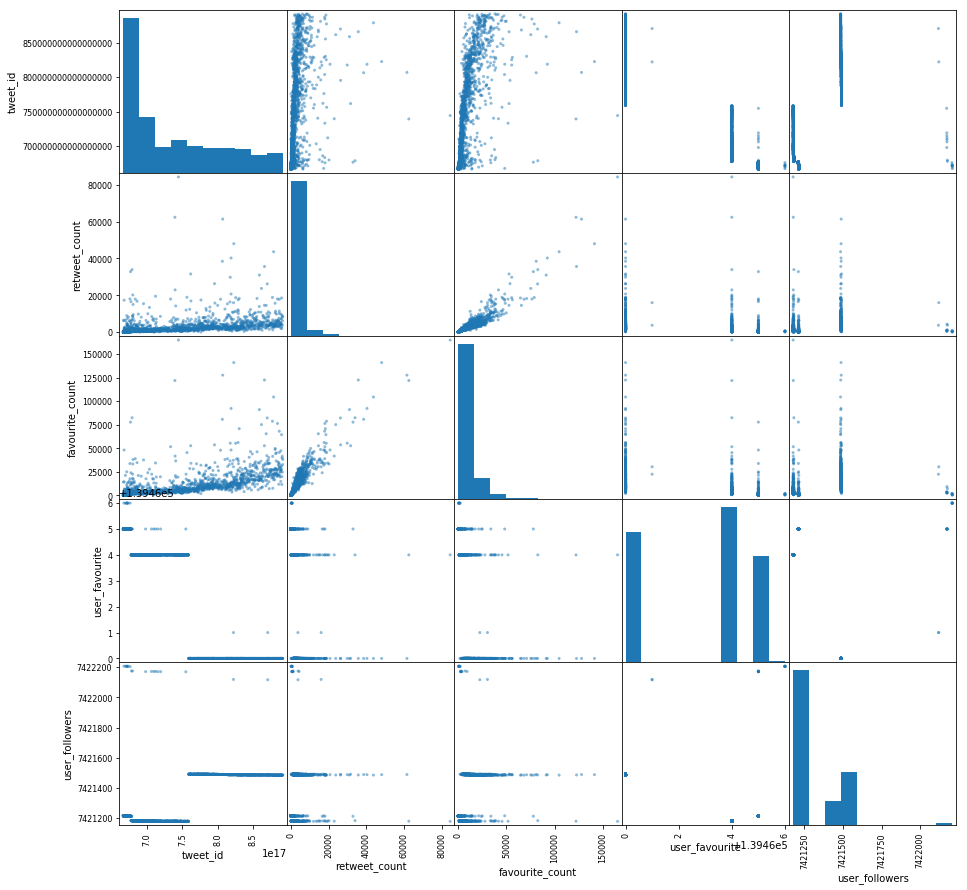

In [89]:
pd.plotting.scatter_matrix(tweet_analysis,figsize=(15,15));

##### What is the main source used to send the tweets ? 

In [99]:
sorted_counts = tweet_analysis.source.value_counts()
sorted_counts

iPhone                1953
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

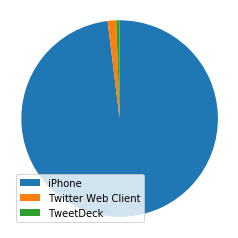

In [108]:
plt.pie(sorted_counts,startangle=90,counterclock =False);
plt.legend(sorted_counts.index,loc=3)
plt.axis('square');

 All most exclusively iPhone as source

##### What kind of  distribution has Retweet count?

By observing the distribution, as we saw that it was right skewed, a plot with logarithmic scale is prefered

Text(0.5,1,'Retweet Distribution in log scale')

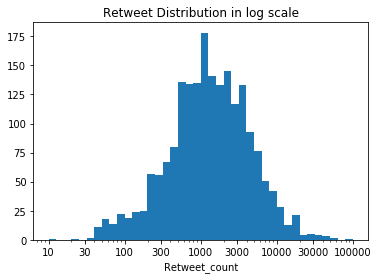

In [169]:
# look a the distribution of the text lengths
bins = 10 ** np.arange(1,5.0+0.1,0.1)
ticks=[10,30,100,300,1000,3000,10000,30000,100000]
labels = ['{}'.format(val) for val in ticks]
plt.hist(data=tweet_analysis,x='retweet_count',bins=bins);
plt.xscale('log')
plt.xticks(ticks,labels)
plt.xlabel('Retweet_count')
plt.title('Retweet Distribution in log scale')

Under logarithmic scale, we can observe a rather Normal distribution

Text(0.5,1,'Retweet_count Boxplot')

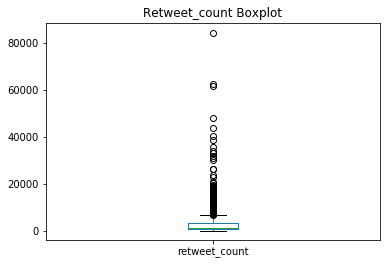

In [170]:
tweet_analysis.retweet_count.plot(kind='box');
plt.title('Retweet_count Boxplot')

By visualizing the Boxplot, one can observe a lot of outliers on the higher limit, which confirms the fact that the distribution is right skewed

##### Are there some insights linked to the length of the tweets and its distrubtion?

In [132]:
# Adding a column with the text lenght to the dataframe
tweet_analysis['text_length'] = tweet_analysis['text'].apply(len)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [135]:
tweet_analysis.text_length.min(),tweet_analysis.text_length.max()

(36, 167)

Text(0,0.5,'Length of the text string(#caracters)')

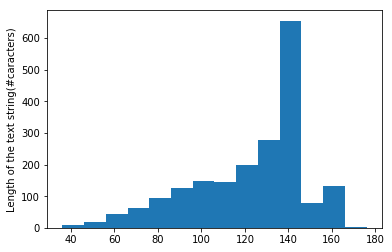

In [143]:
# look a the distribution of the text lengths
bin_edges = np.arange(36,167+10,10)
plt.hist(data=tweet_analysis,x='text_length',bins=bin_edges);
plt.ylabel('Length of the text string(#caracters)')

In [145]:
tweet_analysis.text_length.describe()

count    1992.000000
mean      122.277108
std        26.051402
min        36.000000
25%       105.000000
50%       132.000000
75%       139.000000
max       167.000000
Name: text_length, dtype: float64

In this population, 75% of the text messages are bigger or equal to 105 characters

Text(0.5,1,'text_length BoxPlot')

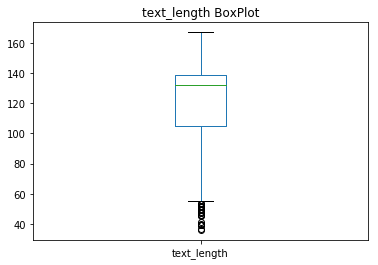

In [171]:
tweet_analysis.text_length.plot(kind='box');
plt.title('text_length BoxPlot')

By visualizing the Boxplot, one can see that there are quite a few of outliers on the downlimit. Would indicate a left skewed distribution

##### Is there a relation between text_length and retweet_count?

Text(0.5,1,'Scatterplot retweet_count vs text_length')

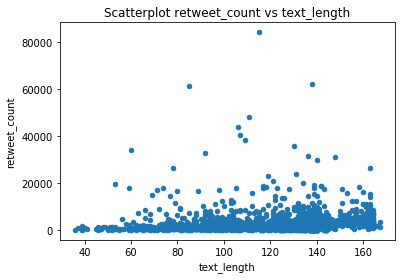

In [172]:
tweet_analysis.plot(x='text_length',y='retweet_count',kind='scatter');
plt.title('Scatterplot retweet_count vs text_length')

##### => Linear Regression

In [150]:
tweet_analysis['intercept']=1
lmT =sm.OLS(tweet_analysis['retweet_count'],tweet_analysis[['intercept','text_length']])
resultsT = lmT.fit()
resultsT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.862
Date:                Tue, 13 Nov 2018   Prob (F-statistic):             0.0495
Time:                        23:01:19   Log-Likelihood:                -19691.
No. Observations:                1992   AIC:                         3.939e+04
Df Residuals:                    1990   BIC:                         3.940e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    1688.8700    511.312      3.303      0.001     686.108    2691.632
text_length     8.0374      4.090      1.965      0.050       0.017      16.058
==============================================================================
Omnibus:                     2646.171   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           591319.938
Skew:                           7.298   Prob(JB):                         0.00
Kurtosis:                      86.134   Cond. No.                         600.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Correlation coefficient

In [151]:
np.sqrt(0.002)

0.044721359549995794

Correlation coefficient is close to 0. Statistically, there's no linear relation between the length of the origina tweet text and the retweet count.

##### Is there a relation between favorite-count and retweet-count?

Text(0.5,1,'Scatterplot retweet_count vs favourite_count')

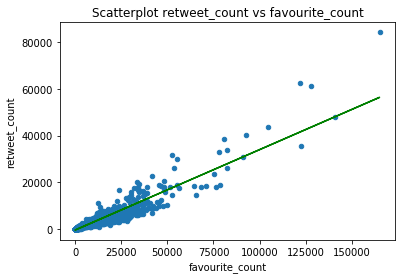

In [173]:
tweet_analysis.plot(x='favourite_count',y='retweet_count',kind='scatter')
# plot with results of linear regression in cells hereunder (first run next cell)
x=tweet_analysis['favourite_count']
plt.plot(x,-347.4041+0.3439*x,'-g')
plt.title('Scatterplot retweet_count vs favourite_count')

###### => Linear Regression

In [127]:
lm = sm.OLS(tweet_analysis['retweet_count'],tweet_analysis[['intercept','favourite_count']])
results = lm.fit()
results.summary()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Tue, 13 Nov 2018   Prob (F-statistic):               0.00
Time:                        22:29:33   Log-Likelihood:                -17703.
No. Observations:                1992   AIC:                         3.541e+04
Df Residuals:                    1990   BIC:                         3.542e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept        -347.4041     47.534     -7.309      0.000    -440.625    -254.183
favourite_count     0.3439      0.003    112.647      0.000       0.338       0.350
==============================================================================
Omnibus:                     1787.000   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           239430.041
Skew:                           3.662   Prob(JB):                         0.00
Kurtosis:                      56.208   Cond. No.                     1.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### Correlation coefficient

In [129]:
np.sqrt(0.864)

0.92951600308978

Correlation coefficient is close to 1, we can statistically assume that there is a linear relation betweet the retweet_count and favourite_count

<a id='conclusion'></a>
## Part VI: Conclusion

After Gathering, Assessing and Cleaning the data some analysis was done on the cleaned master data_frame with tweet info from WeRateDogs:

- For the studied population, the main source is from far the iPhone
- Some univariate exploration was done on retweet_count and after on the length of the text (from the tweets)
- The distribution of the retweet_count seems right skewed, and was then also best represented with a logarithmic scale. Allowing to observe a Normal kind of distribution
- The distribution of the length of the text messages seems left skewed. And 75% of the tweets are longer than 105 characters.
- Some Bivariate exploration was made too, first tweet_length vs retweet_count and the favorite_count. After applying a linear regression model, and analysing the correlation coefficients, statistically speaking no linear relation was found between tweet_length and retweet_count. But for the other pair, a pretty strong linear relation was found.